# Develop a Chatbot Using Python, NLTK, and TensorFlow

In [1]:
# Run this cell so you do not see GPU availibility errors from tensorflow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Task 1: Import the Required Libraries

In [2]:
import json
import pickle
import random
import nltk
from nltk.stem import WordNetLemmatizer
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Task 2: Load the Data

In [5]:
#Load the data
nltk.download('omw-1.4')
with open(r'intents.json') as data:
    intents = json.loads(data.read())

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Task 3: Tokenization

In [6]:
words = []
classes = []
documents = []

for intent in intents['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        classes.append(intent['tag'])
        documents.append((w, intent['tag']))

# Task 4: Lemmatization

In [8]:
lemmatizer = WordNetLemmatizer()
ignore_words = ['?', '!']
words = [lemmatizer.lemmatize(w.lower())for w in words if w not in ignore_words]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))

pickle.dump(words, open('words.pkl', 'wb'))
pickle.dump(classes, open('classes.pkl', 'wb'))

# Task 5: Create Data for Training

In [9]:
training = []
output_empty = [0]*len(classes)

for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower())for word in pattern_words]
    for w in words:
        if w in pattern_words:
            bag.append(1)
        else: bag.append(0)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])
    
random.shuffle(training)
a = int(0.7*len(training))
training = np.array(training, dtype = 'object')
X_train = list(training[:a, 0])
y_train = list(training[:a, 1])
X_val = list(training[a:, 0])
y_val = list(training[a:, 1])

# Task 6: Design the Model

In [10]:
model = Sequential()
model.add(Dense(128, input_shape=(len(X_train[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y_train[0]), activation='softmax'))

# Task 7: Train and Save the Model

In [12]:
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])
hist = model.fit(np.array(X_train),
                np.array(y_train),
                epochs = 200,
                batch_size=5, validation_data=(X_val, y_val),
                 verbose =1 )
model.save('trained_model.h5', hist)

Epoch 1/200
7/7 [==============================] - 2s 93ms/step - loss: 2.2500 - accuracy: 0.0625 - val_loss: 2.2055 - val_accuracy: 0.0000e+00
Epoch 2/200
7/7 [==============================] - 0s 12ms/step - loss: 2.1612 - accuracy: 0.1562 - val_loss: 2.2325 - val_accuracy: 0.0000e+00
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 2.2104 - accuracy: 0.0938 - val_loss: 2.2512 - val_accuracy: 0.0000e+00
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 2.0374 - accuracy: 0.2188 - val_loss: 2.2456 - val_accuracy: 0.0000e+00
Epoch 5/200
7/7 [==============================] - 0s 13ms/step - loss: 1.9191 - accuracy: 0.3125 - val_loss: 2.2549 - val_accuracy: 0.0000e+00
Epoch 6/200
7/7 [==============================] - 0s 13ms/step - loss: 1.9125 - accuracy: 0.3750 - val_loss: 2.2266 - val_accuracy: 0.0667
Epoch 7/200
7/7 [==============================] - 0s 13ms/step - loss: 1.7730 - accuracy: 0.4062 - val_loss: 2.2071 - val_accuracy: 0.0667


# Task 8: Print the training curves

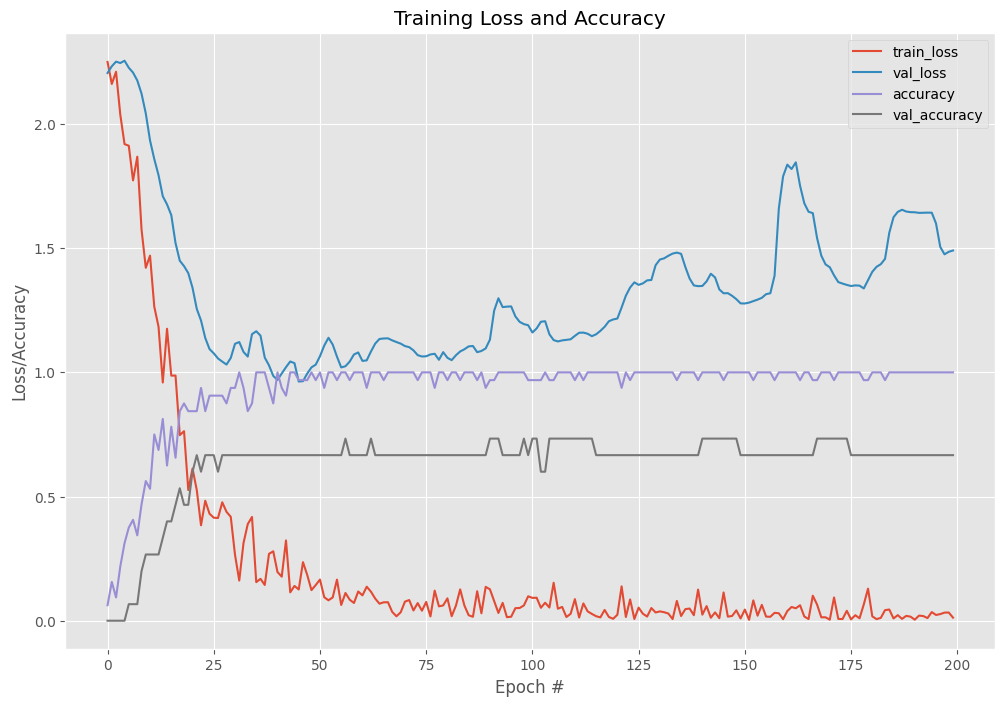

In [13]:
plt.rcParams["figure.figsize"]=(12,8)
N = np.arange(0, 200)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, hist.history["loss"], label = 'train_loss')
plt.plot(N, hist.history["val_loss"], label = 'val_loss')
plt.plot(N, hist.history['accuracy'], label = 'accuracy')
plt.plot(N, hist.history["val_accuracy"], label = 'val_accuracy')
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()